In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('heart.csv')


1.- age

2.- sex

3.- chest pain type (4 values)

4.- resting blood pressure

5.- serum cholestoral in mg/dl

6.- fasting blood sugar > 120 mg/dl

7.- resting electrocardiographic results (values 0,1,2)

8.- maximum heart rate achieved

9.- exercise induced angina

10.- oldpeak = ST depression induced by exercise relative to rest

11.- the slope of the peak exercise ST segment

12.- number of major vessels (0-3) colored by flourosopy

13.- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

In [112]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [113]:
df.target.unique()

array([1, 0])

# **REGRESIÓN LOGÍSTICA**

##  **PREGUNTA 1:** En caso de aplicar un modelo lineal, ¿qué deberíamos emplear, regresión lineal o logística?

### **Opción 1**

In [3]:
y = df['target']
X = df.drop(['target'],axis = 1)

Estandarizamos

In [11]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

*Aplica un método lineal*

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [13]:
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(X_scaled, y, train_size=0.7)


In [118]:
modelo = LogisticRegression()
modelo.fit(X = X_train_logistic, y = y_train_logistic)

LogisticRegression()

In [119]:
y_pred_logistic = modelo.predict(X_test_logistic)

In [120]:
y_pred_logistic

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1])

In [121]:
y_pred_probabilidades = modelo.predict_proba(X = X_test_logistic)
y_pred_probabilidades = pd.DataFrame(y_pred_probabilidades, columns = modelo.classes_)
y_pred_probabilidades.head(5)

,0,1
0,0.014183,0.985817
1,0.006266,0.993734
2,0.356662,0.643338
3,0.735176,0.264824
4,0.044277,0.955723


In [122]:
print("Intercept:", modelo.intercept_)
print("Coeficientes:", list(zip(X.columns, modelo.coef_.flatten(), )))

print("Accuracy:", modelo.score(X_test_logistic, y_test_logistic))

Intercept: [0.23967994]
Coeficientes: [('age', -0.0498012662645267), ('sex', -0.8026886020214866), ('cp', 0.8052916094530405), ('trestbps', -0.4130438333544616), ('chol', -0.228822244252048), ('fbs', 0.1966013200221223), ('restecg', 0.21622117817707864), ('thalach', 0.5074966901223652), ('exang', -0.43432222377835983), ('oldpeak', -0.2659992557849716), ('slope', 0.5478595977711346), ('ca', -0.7225590992301913), ('thal', -0.3441113024562918)]
Accuracy: 0.8461538461538461


### **Opción 2**

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

X = df.drop(['target'],axis = 1)
y = df['target']

X_train_pipe, X_test_pipe, y_train_pipe, y_test_pipe = train_test_split(X, y, train_size=0.7)

# Pipeline se usa para encadenar múltiples estimadores en uno
pipe = Pipeline([('scaler', StandardScaler()), ('logistic', LogisticRegression())])

pipe.fit(X_train_pipe, y_train_pipe).score(X_test_pipe, y_test_pipe)

0.8021978021978022

In [124]:
pipe

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [125]:
# Los estimadores de un pipeline se almacenan como una lista en el atributo steps
pipe.steps[1][1]

LogisticRegression()

In [126]:
# Los estimadores de un pipeline se almacenan como una lista en el atributo steps
print("Intercept:", pipe.steps[1][1].intercept_)
print("Coeficientes:", list(zip(X.columns, pipe.steps[1][1].coef_.flatten(), )))

Intercept: [-0.20754546]
Coeficientes: [('age', -0.2485825173343453), ('sex', -0.8426022533607985), ('cp', 0.695260202953429), ('trestbps', -0.3876006984650952), ('chol', -0.22205300487629656), ('fbs', 0.11443675168363986), ('restecg', 0.24176205357907551), ('thalach', 0.45541299708642086), ('exang', -0.5331127534535476), ('oldpeak', -0.43711413971799556), ('slope', 0.5927703590860488), ('ca', -0.8063187018232146), ('thal', -0.4696794973171165)]


In [127]:
predict_probs = pipe.predict_proba(X_test_pipe)
predict_probs[:5,:]

array([[0.66197386, 0.33802614],
       [0.39592759, 0.60407241],
       [0.94462608, 0.05537392],
       [0.0842014 , 0.9157986 ],
       [0.99644677, 0.00355323]])

## **PREGUNTA 2:** ¿Cuál es el coeficiente para la variable 'exang'?

In [128]:
print("Coeficiente " + X.columns.values[8] + " es " + str(modelo.coef_[0][8]))

Coeficiente exang es -0.43432222377835983


## **PREGUNTA 3:** ¿Que accuracy obtenemos?

### **Opción 1**

In [129]:
print("Accuracy:", modelo.score(X_test_logistic, y_test_logistic))

Accuracy: 0.8461538461538461


### **Opción 2**

In [154]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_logistic, y_pred_logistic)

0.8461538461538461

## **PREGUNTA 4:** ¿Qué % tiene la segunda muestra (fila 3) para la clase 0?

In [131]:
y_pred_probabilidades.head(5)

,0,1
0,0.014183,0.985817
1,0.006266,0.993734
2,0.356662,0.643338
3,0.735176,0.264824
4,0.044277,0.955723


## **PARÁMETROS**

Los algoritmos presentan una serie de parámetros. En el caso de LogisticRegressiion:


> class sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

siendo la función de coste a minimizar:

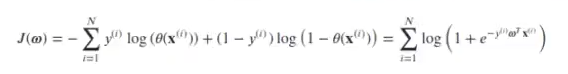


C es el parámetro que permite controlar la complejidad del algoritmo, penalizando los errores que se cometen en la clasificación. Este parámetro supone un compromiso entre la exactitud de la solución y la complejidad del algoritmo:



*   Cuanto mayor es C (menor es a), más penalizamos los errores en clasificación y la frontera se ajusta mucho a los datos (en el caso extremo se ajustará perfectamente). Riesgo de overfitting, pero con potencial menor error de clasificación.
*   Cuanto menor es C (mayor es a), menos penalizamos los errores en clasificación y tenderemos hacia modelos más sencillos (fronteras menos ajustadas, menor riesgo de overfitting, pero potencialmente con más error de clasificación).

In [14]:
modelo = LogisticRegression()                       # C = 1.0 (valor por defecto)
modelo.fit(X = X_train_logistic, y = y_train_logistic)
y_pred_logistic = modelo.predict(X_test_logistic)
print("Accuracy:", modelo.score(X_test_logistic, y_test_logistic))

Accuracy: 0.8131868131868132


In [15]:
modelo = LogisticRegression()                       # C = 0.4 (valor por defecto)
modelo.fit(X = X_train_logistic, y = y_train_logistic)
y_pred_logistic = modelo.predict(X_test_logistic)
print("Accuracy:", modelo.score(X_test_logistic, y_test_logistic))

Accuracy: 0.8131868131868132


Otro ejemplo en: https://keepcoding.io/blog/regularizacion-sobre-algoritmos-de-clasificacion/

# **SVM (Máquinas de vectores de soporte)**

## **SVC (Clasificación)**

### **PREGUNTA 5:** Qué accuracy obtenemos mediante SVM?

#### **Respuesta**

In [132]:
X_train_SVM, X_test_SVM, y_train_SVM, y_test_SVM = train_test_split(X_scaled, y, train_size=0.7)


In [160]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

modelo = SVC(kernel='linear')
modelo.fit(X_train_SVM,y_train_SVM)
y_pred_SVM = modelo.predict(X_test_SVM)
print(accuracy_score(y_test_SVM, y_pred_SVM))

0.8351648351648352


In [134]:
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

print(classification_report(y_test_SVM, y_pred_SVM))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83        46
           1       0.80      0.89      0.84        45

    accuracy                           0.84        91
   macro avg       0.84      0.84      0.83        91
weighted avg       0.84      0.84      0.83        91



#### **Respuesta mejorada**

Todos los algoritmos tienen una serie de parámetros, conocidos como hiperparámetros, que hay que seleccionar. Vamos a ver cómo seleccionar el mejor conjunto de hiperparámetros con GridSearchCV.

In [135]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train_SVM, y_train_SVM)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.767 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.860 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.857 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.786 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.857 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.558 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.558 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.571 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.571 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.571 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.767 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             verbose=3)

In [136]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1, gamma=0.1)


In [137]:
grid_predictions = grid.predict(X_test_SVM)

# print classification report
print(classification_report(y_test_SVM, grid_predictions))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82        46
           1       0.81      0.84      0.83        45

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



## **SVR (Regresión)**
https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html

In [138]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVR

# Generamos los datos
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

In [139]:
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

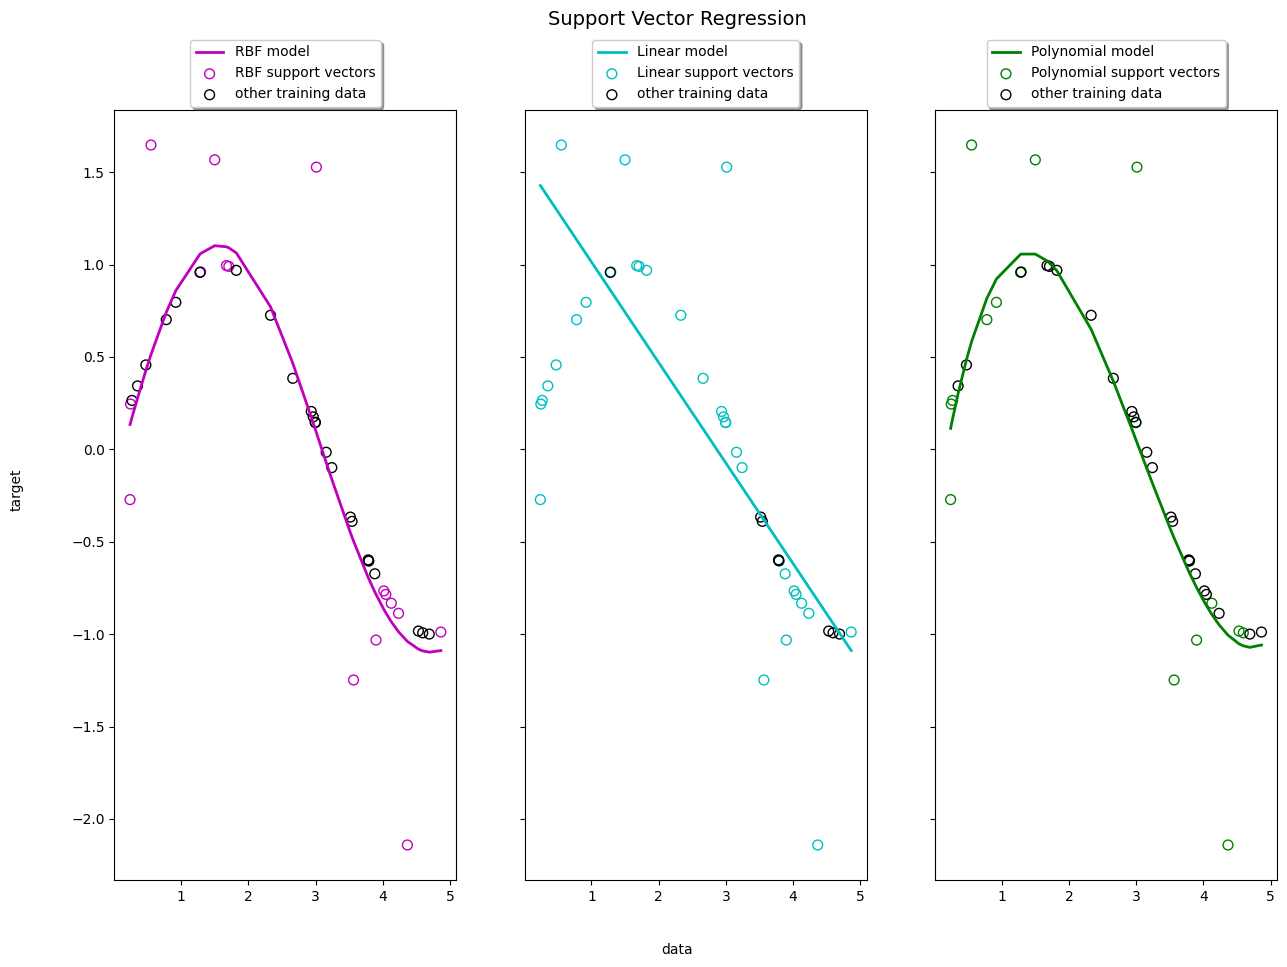

In [140]:
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ["RBF", "Linear", "Polynomial"]
model_color = ["m", "c", "g"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(
        X,
        svr.fit(X, y).predict(X),
        color=model_color[ix],
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[svr.support_],
        y[svr.support_],
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[np.setdiff1d(np.arange(len(X)), svr.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr.support_)],
        facecolor="none",
        edgecolor="k",
        s=50,
        label="other training data",
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

# **DECISION TREE**

In [161]:
y = df['target']
X = df.drop(['target'],axis = 1)

X_train_DT, X_test_DT, y_train_DT, y_test_DT = train_test_split(X_scaled, y, train_size=0.7)

In [166]:
from sklearn import tree

modelo = tree.DecisionTreeClassifier(random_state=0)
modelo = clf.fit(X_train_DT, y_train_DT)

In [167]:
y_pred_DT = clf.predict(X_test_DT)

In [168]:
print("Accuracy:", modelo.score(X_test_DT, y_test_DT))

Accuracy: 0.7142857142857143


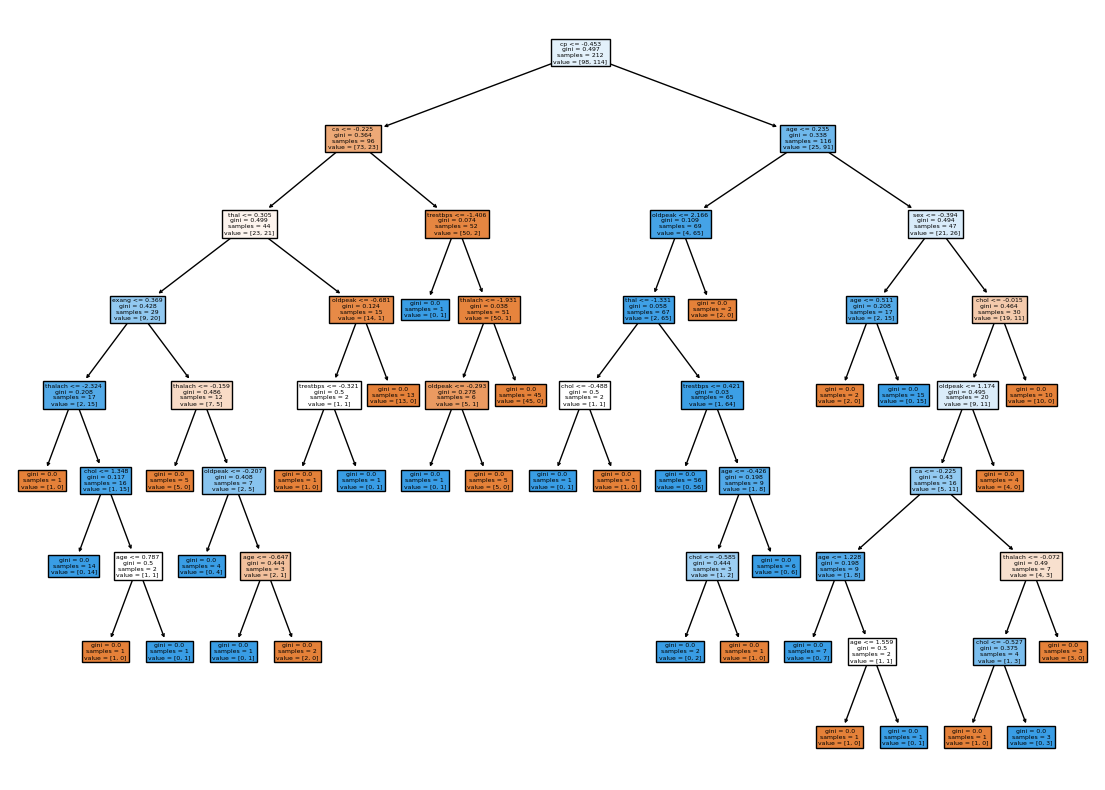

In [169]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize = (14, 10))
plot_tree(modelo, filled = True, feature_names = X.columns)
plt.show()

## **PREGUNTA 6:** Del segundo al tercer nivel, ¿mejora la métrica *gini* en todos los casos?

In [149]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

# **Precision:** cuantos pacientes hemos estimado correctamente que tienen un problema de corazón (TP) respecto el total de los que hemos estimado que lo tienen (TP+FP)

In [150]:
from sklearn.metrics import precision_score

In [170]:
precision_score(y_test_logistic, y_pred_logistic, average='binary')

0.8135593220338984

In [171]:
precision_score(y_test_SVM, y_pred_SVM, average='binary')

0.8

In [172]:
precision_score(y_test_DT, y_pred_DT, average='binary')

0.7659574468085106

# **Recall:** cuantos pacientes hemos estimado que tienen problemas de corazón correctamente (TP) teniendo en cuenta los que si lo tienen y los que lo tienen pero se han clasificado como que no (FN) -> **NOS INTERESA**

In [173]:
from sklearn.metrics import recall_score

In [174]:
recall_score(y_test_logistic, y_pred_logistic, average='binary')

0.9411764705882353

In [175]:
recall_score(y_test_SVM, y_pred_SVM, average='binary')

0.8888888888888888

In [158]:
recall_score(y_test_DT, y_pred_DT, average='binary')

0.6904761904761905

# **PREGUNTA 7:** Si lo que nos interesa es acertar bien los que tienen problemas de corazón, aunque detectemos algunos que no lo sean (de esta manera evitamos que aquellos que sí que tienen problemas no los perdamos), ¿qué métrica debemos analizar? ¿Encontramos alguna diferencia entre el modelo que era mejor por accuracy que el modelo que es mejor en base a esta definición?
